In [44]:
from typing import Literal
from typing_extensions import TypedDict
class TypedDictState(TypedDict):
    name: str
    mood: Literal["happy", "sad"]

In [45]:
import random
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

def node_1(state):
    print("---Node 1---")
    return {"name": state['name'] + " is ... "}

def node_2(state):
    print("---Node 2---")
    return {"mood": "happy"}

def node_3(state):
    print("---Node 3---")
    return {"mood": "sad"}

def decide_mood(state) -> Literal["node_2", "node_3"]:

    # Here, let's just do a 50 / 50 split between nodes 2, 3
    if random.random() < 0.5:

        # 50% of the time, we return Node 2
        return "node_2"

    # 50% of the time, we return Node 3
    return "node_3"

## Build graph

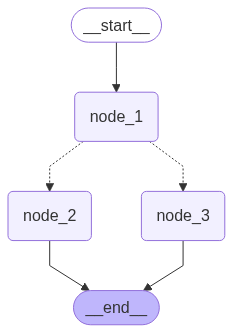

In [46]:
builder = StateGraph(TypedDictState)
builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)
builder.add_node("node_3", node_3)

#logic
builder.add_edge(START, "node_1")
builder.add_conditional_edges(
    "node_1",
    decide_mood
)
builder.add_edge("node_2", END)
builder.add_edge("node_3", END)

# Add
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

## Dataclass

In [47]:
from dataclasses import dataclass

@dataclass
class DataclassState:
    name: str
    mood: Literal["happy", "sad"]

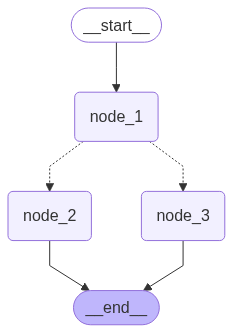

In [48]:
def node_1(state):
    print("---Node 1---")
    return {"name": state.name + " is ... "}


# Build graph
builder = StateGraph(DataclassState)
builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)
builder.add_node("node_3", node_3)

# Logic
builder.add_edge(START, "node_1")
builder.add_conditional_edges("node_1", decide_mood)
builder.add_edge("node_2", END)
builder.add_edge("node_3", END)

# Add
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [49]:
graph.invoke(DataclassState(name="Lance", mood="sad"))

---Node 1---
---Node 2---


{'name': 'Lance is ... ', 'mood': 'happy'}

In [50]:
graph.invoke({
    "name": "Lance",
    "mood":"sad"
})

---Node 1---
---Node 2---


{'name': 'Lance is ... ', 'mood': 'happy'}

In [51]:
dataclass_instance = DataclassState(name="Lance", mood="mad")

## Pydantic

In [52]:
from pydantic import BaseModel
from typing import Literal

class PydanticState(BaseModel):
    name: str
    mood: Literal["happy", "sad"]

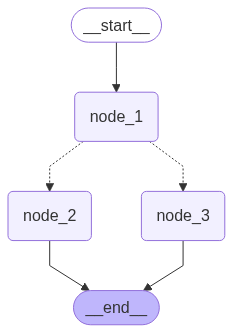

In [53]:
def node_1(state):
    print("---Node 1---")
    return {"name": state.name + " is ... "}


# Build graph
builder = StateGraph(PydanticState)
builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)
builder.add_node("node_3", node_3)

# Logic
builder.add_edge(START, "node_1")
builder.add_conditional_edges("node_1", decide_mood)
builder.add_edge("node_2", END)
builder.add_edge("node_3", END)

# Add
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [74]:
graph.invoke({
    "name": "Lance",
    "mood": "happy"
})

---Node 1---
---Node 3---


{'name': 'Lance is ... ', 'mood': 'sad'}

In [73]:
graph.invoke({
    "name": "Lance",
    "mood":"hot"
})

ValidationError: 1 validation error for PydanticState
mood
  Input should be 'happy' or 'sad' [type=literal_error, input_value='hot', input_type=str]
    For further information visit https://errors.pydantic.dev/2.11/v/literal_error